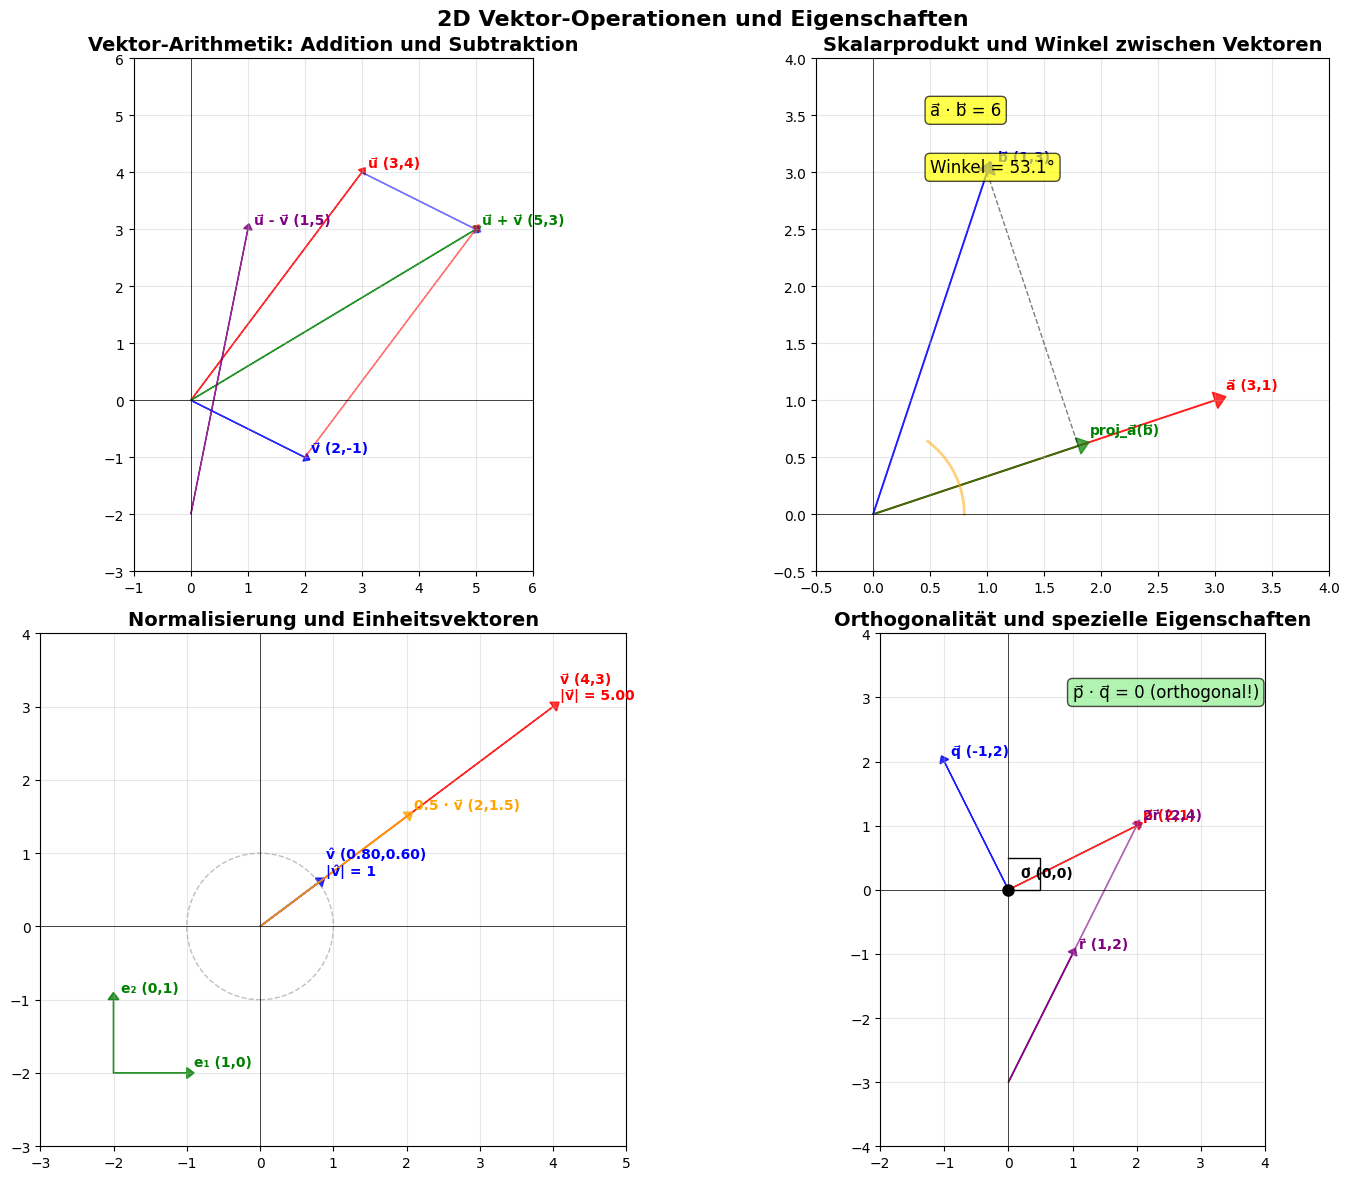

VEKTOR-OPERATIONEN ÜBERSICHT

Beispielvektoren:
u⃗ = Vector2D(3, 4)
v⃗ = Vector2D(2, -1)

Arithmetische Operationen:
u⃗ + v⃗ = Vector2D(5, 3)
u⃗ - v⃗ = Vector2D(1, 5)
2 * u⃗ = Vector2D(6, 8)

Vektor-Eigenschaften:
|u⃗| = 5.000
|v⃗| = 2.236
û = Vector2D(0.6, 0.8)

Vektor-Operationen:
u⃗ · v⃗ = 2
Winkel zwischen u⃗ und v⃗ = 79.7°

Orthogonalitätstest:
p⃗ · q⃗ = 0 (orthogonal: True)

Parallelitätstest:
r⃗ = Vector2D(1, 2)
2r⃗ = Vector2D(2, 4)
Parallel: True


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import acos, sqrt, pi, degrees
from vector_oop import Vector2D

def draw_vector(ax, vector, origin=(0, 0), color='blue', label=None, width=0.005, alpha=0.8):
    """Draw a vector as an arrow."""
    ax.arrow(origin[0], origin[1], vector[0], vector[1], 
             head_width=0.15, head_length=0.1, fc=color, ec=color, 
             width=width, alpha=alpha)
    
    # Add label at the tip of the vector
    if label:
        ax.text(origin[0] + vector[0] + 0.1, origin[1] + vector[1] + 0.1, 
                label, fontsize=10, color=color, fontweight='bold')

def draw_arc(ax, center, radius, start_angle, end_angle, color='gray', alpha=0.5):
    """Draw an arc to show angles."""
    angles = np.linspace(start_angle, end_angle, 50)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    ax.plot(x, y, color=color, alpha=alpha, linewidth=2)

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('2D Vektor-Operationen und Eigenschaften', fontsize=16, fontweight='bold')

# =============================================================================
# Subplot 1: Grundlegende Vektor-Arithmetik
# =============================================================================
ax1.set_title('Vektor-Arithmetik: Addition und Subtraktion', fontsize=14, fontweight='bold')

# Beispielvektoren
u = Vector2D(3, 4)
v = Vector2D(2, -1)

# Addition
sum_vector = u + v
draw_vector(ax1, u, color='red', label='u⃗ (3,4)')
draw_vector(ax1, v, color='blue', label='v⃗ (2,-1)')
draw_vector(ax1, sum_vector, color='green', label='u⃗ + v⃗ (5,3)')

# Zeige Parallelogramm-Regel
draw_vector(ax1, v, origin=(u[0], u[1]), color='blue', alpha=0.5, width=0.002)
draw_vector(ax1, u, origin=(v[0], v[1]), color='red', alpha=0.5, width=0.002)

# Subtraktion
diff_vector = u - v
draw_vector(ax1, diff_vector, origin=(0, -2), color='purple', label='u⃗ - v⃗ (1,5)')

ax1.set_xlim(-1, 6)
ax1.set_ylim(-3, 6)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# =============================================================================
# Subplot 2: Skalarprodukt und Winkel
# =============================================================================
ax2.set_title('Skalarprodukt und Winkel zwischen Vektoren', fontsize=14, fontweight='bold')

# Neue Vektoren für bessere Visualisierung
a = Vector2D(3, 1)
b = Vector2D(1, 3)

draw_vector(ax2, a, color='red', label='a⃗ (3,1)')
draw_vector(ax2, b, color='blue', label='b⃗ (1,3)')

# Skalarprodukt berechnen
dot_prod = a.dot_product(b)
angle_rad = a.angle_with(b)
angle_deg = degrees(angle_rad)

# Winkel-Bogen zeichnen
draw_arc(ax2, (0, 0), 0.8, 0, angle_rad, color='orange')

# Projektionen zeigen
# Projektion von b auf a
proj_length = dot_prod / a.magnitude()
proj_direction = a.normalize()
projection = proj_direction * proj_length
draw_vector(ax2, projection, color='green', label=f'proj_a⃗(b⃗)', alpha=0.7)

# Gestrichelte Linie von b-Spitze zur Projektion
ax2.plot([b[0], projection[0]], [b[1], projection[1]], 
         'k--', alpha=0.5, linewidth=1)

# Text mit Informationen
ax2.text(0.5, 3.5, f'a⃗ · b⃗ = {dot_prod}', fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
ax2.text(0.5, 3.0, f'Winkel = {angle_deg:.1f}°', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax2.set_xlim(-0.5, 4)
ax2.set_ylim(-0.5, 4)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

# =============================================================================
# Subplot 3: Normalisierung und Einheitsvektoren
# =============================================================================
ax3.set_title('Normalisierung und Einheitsvektoren', fontsize=14, fontweight='bold')

# Originalvektor
original = Vector2D(4, 3)
draw_vector(ax3, original, color='red', label=f'v⃗ (4,3)\n|v⃗| = {original.magnitude():.2f}')

# Normalisierter Vektor
normalized = original.normalize()
draw_vector(ax3, normalized, color='blue', label=f'v̂ ({normalized[0]:.2f},{normalized[1]:.2f})\n|v̂| = 1')

# Einheitsvektoren
e1 = Vector2D(1, 0)
e2 = Vector2D(0, 1)
draw_vector(ax3, e1, origin=(-2, -2), color='green', label='e₁ (1,0)')
draw_vector(ax3, e2, origin=(-2, -2), color='green', label='e₂ (0,1)')

# Einheitskreis
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
ax3.add_patch(circle)

# Skalarmultiplikation zeigen
scaled = original * 0.5
draw_vector(ax3, scaled, color='orange', label='0.5 · v⃗ (2,1.5)')

ax3.set_xlim(-3, 5)
ax3.set_ylim(-3, 4)
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# =============================================================================
# Subplot 4: Orthogonalität und spezielle Eigenschaften
# =============================================================================
ax4.set_title('Orthogonalität und spezielle Eigenschaften', fontsize=14, fontweight='bold')

# Orthogonale Vektoren
orth1 = Vector2D(2, 1)
orth2 = Vector2D(-1, 2)

draw_vector(ax4, orth1, color='red', label='p⃗ (2,1)')
draw_vector(ax4, orth2, color='blue', label='q⃗ (-1,2)')

# Prüfe Orthogonalität
dot_orth = orth1.dot_product(orth2)
ax4.text(1, 3, f'p⃗ · q⃗ = {dot_orth} (orthogonal!)', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

# Rechten Winkel zeigen
ax4.plot([0, 0.5, 0.5, 0], [0, 0, 0.5, 0.5], 'k-', linewidth=1)

# Parallele Vektoren
parallel1 = Vector2D(1, 2)
parallel2 = Vector2D(2, 4)  # 2 * parallel1

draw_vector(ax4, parallel1, origin=(0, -3), color='purple', label='r⃗ (1,2)')
draw_vector(ax4, parallel2, origin=(0, -3), color='purple', alpha=0.5, label='2r⃗ (2,4)')

# Nullvektor
zero_vec = Vector2D(0, 0)
ax4.plot(0, 0, 'ko', markersize=8)
ax4.text(0.2, 0.2, '0⃗ (0,0)', fontsize=10, fontweight='bold')

ax4.set_xlim(-2, 4)
ax4.set_ylim(-4, 4)
ax4.grid(True, alpha=0.3)
ax4.set_aspect('equal')
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.axvline(x=0, color='k', linewidth=0.5)

# Adjust layout and show
plt.tight_layout()
plt.show()


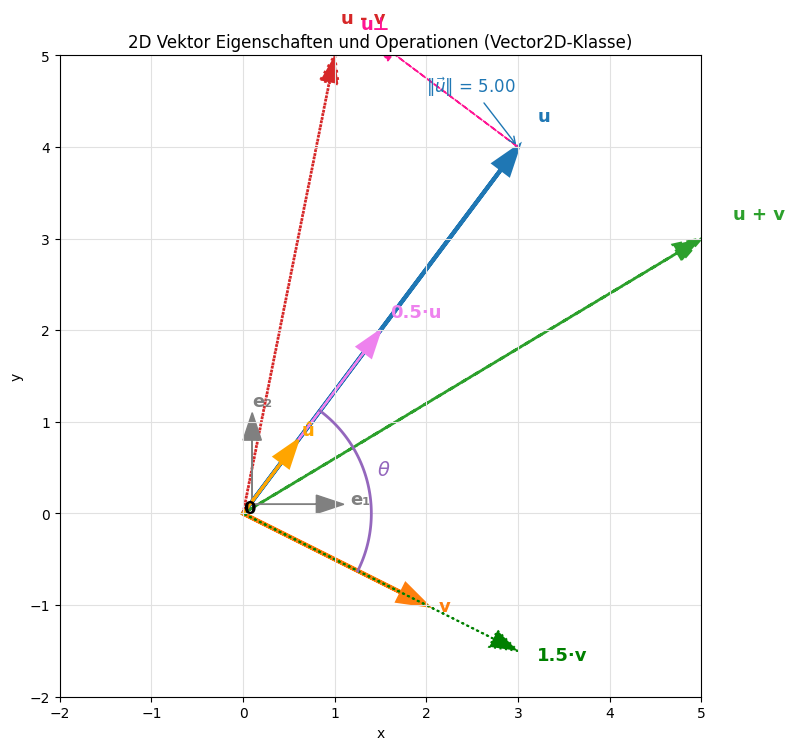

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from vector_oop import Vector2D

def draw_vector(ax, v, color, label, origin=(0,0), linewidth=2, linestyle='-'):
    ax.arrow(
        origin[0], origin[1], v[0], v[1], 
        head_width=0.2, head_length=0.3, fc=color, ec=color, 
        length_includes_head=True, linewidth=linewidth,
        linestyle=linestyle
    )
    ax.text(
        origin[0] + v[0]*1.07, 
        origin[1] + v[1]*1.07, 
        label, color=color, fontsize=13, weight='bold'
    )

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.grid(True, color='#e1e1e1', zorder=0)
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 5)

# Basisvektoren, Nullvektor, Beispielvektoren
u = Vector2D(3, 4)
v = Vector2D(2, -1)
zero = Vector2D(0, 0)
e1 = Vector2D(1, 0)
e2 = Vector2D(0, 1)

# Addition/Subtraktion
u_plus_v = u + v
u_minus_v = u - v

# Skalarmultiplikation
uk = u * 0.5

# Normierung
u_norm = u.normalize()

# Orthogonaler Vektor (ein Beispiel, im 2D etwa (-y, x))
u_orth = Vector2D(-u[1], u[0])
u_orth = u_orth.normalize() * 2  # Normiert, dann auf Länge 2

# Paralleler Vektor zu v
v_par = v * 1.5

# Zeichnen
draw_vector(ax, u, 'C0', 'u', linewidth=3)
draw_vector(ax, v, 'C1', 'v', linewidth=3)
draw_vector(ax, u_plus_v, 'C2', 'u + v', linestyle='--')
draw_vector(ax, u_minus_v, 'C3', 'u - v', linestyle=':')
draw_vector(ax, e1, 'gray', 'e₁', linewidth=1, origin=(0.1,0.1))
draw_vector(ax, e2, 'gray', 'e₂', linewidth=1, origin=(0.1,0.1))
draw_vector(ax, zero, 'k', '0', linewidth=1)

draw_vector(ax, uk, 'violet', '0.5·u', linewidth=1.5)
draw_vector(ax, u_norm, 'orange', 'û', linewidth=2)
draw_vector(ax, u_orth, 'deeppink', 'u⊥', linewidth=1.2, linestyle='dashed', origin=(u[0],u[1]))
draw_vector(ax, v_par, 'green', '1.5·v', linewidth=1.5, linestyle='dotted', origin=(0,0))

# Visualisierung des Winkels zwischen u und v
from math import atan2, degrees
def plot_angle_arc(ax, v1, v2, radius=1, color='C4', label=r'$\theta$'):
    angle1 = atan2(v1[1], v1[0])
    angle2 = atan2(v2[1], v2[0])
    angles = np.linspace(angle1, angle2, 100)
    xs = radius * np.cos(angles)
    ys = radius * np.sin(angles)
    ax.plot(xs, ys, color=color, linewidth=2)
    mid = int(len(xs)/2)
    ax.text(xs[mid]+0.1, ys[mid]+0.1, label, color=color, fontsize=14)

plot_angle_arc(ax, u, v, radius=1.4, color='C4')

# Zusatz: Norm visualisieren (Betrag von u)
ax.plot([0, u[0]], [0, u[1]], alpha=0)
ax.annotate(
    r"$\|\vec{u}\|$ = %.2f" % abs(u),
    xy=(u[0], u[1]), xycoords='data',
    xytext=(u[0]-1, u[1]+0.6), textcoords='data',
    arrowprops=dict(arrowstyle="->", color='C0'),
    fontsize=12, color='C0'
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("2D Vektor Eigenschaften und Operationen (Vector2D-Klasse)")
plt.tight_layout()
plt.show()